# Modelo de Regresión Logísitica
## Aplicado a Data Set de Vinos
## (Factores que influyen en la Calidad del Vino)

# Regresión Logística

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

## Importar Data Set

In [9]:
data = pd.read_csv('/content/drive/MyDrive/Bedu-Modulo IV/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Limpieza de Data Set

In [12]:
# Eliminar duplicados
data = data.drop_duplicates()

# Eliminar filas con valores nulos
data = data.dropna()

# Resetear el índice
data = data.reset_index(drop=True)

# Mostrar primeras filas
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [13]:
# Calcular correlaciones con 'quality'
correlaciones = data.corr(numeric_only=True)['quality'].drop('quality')
variable_mas_influyente = correlaciones.abs().idxmax()
print(f"La variable que más influye en la calidad del vino es: {variable_mas_influyente}")

La variable que más influye en la calidad del vino es: alcohol


In [14]:
numerical_column_names = data.select_dtypes(include=['number']).columns
print("Numerical Column Names:", numerical_column_names.tolist())

Numerical Column Names: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [15]:
object_column_names = data.select_dtypes(include=['object']).columns
print("Object Column Names:", object_column_names.tolist())

Object Column Names: []


In [16]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [17]:
print(data[data['fixed acidity'] == 0].shape)
print(data[data['volatile acidity'] == 0].shape)
print(data[data['citric acid'] == 0].shape) # 118 FILAS = 0, PARECE MUY ALTO Y PODRÍA SER ERRÓNEO PERO NO MODIFIQUÉ
print(data[data['residual sugar'] == 0].shape)
print(data[data['chlorides'] == 0].shape)
print(data[data['free sulfur dioxide'] == 0].shape)
print(data[data['total sulfur dioxide'] == 0].shape)
print(data[data['density'] == 0].shape)
print(data[data['pH'] == 0].shape)
print(data[data['sulphates'] == 0].shape)
print(data[data['alcohol'] == 0].shape)
print(data[data['quality'] == 0].shape)

(0, 12)
(0, 12)
(118, 12)
(0, 12)
(0, 12)
(0, 12)
(0, 12)
(0, 12)
(0, 12)
(0, 12)
(0, 12)
(0, 12)


In [18]:
# Creando una columna llamada "high quality"
# Si quality < 7 ==> baja calidad
# Si quality >= 7 ==> alta calidad

data['high_quality'] = data['quality'].apply(lambda x: 1 if x >= 7 else 0)


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
 12  high_quality          1359 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 138.2 KB


In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [21]:
# Seleccionar variables predictoras y objetivo

X = data.drop(['quality', 'high_quality'], axis=1)  # Variables predictoras
y = data['high_quality']  # Variable objetivo binaria

In [22]:
# Dividir en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Entrenando al modelo

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [25]:
# Hacer predicciones y evaluar al modelo

y_pred = model.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8921568627450981

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       354
           1       0.68      0.35      0.46        54

    accuracy                           0.89       408
   macro avg       0.79      0.66      0.70       408
weighted avg       0.88      0.89      0.88       408


Matriz de confusión:
 [[345   9]
 [ 35  19]]


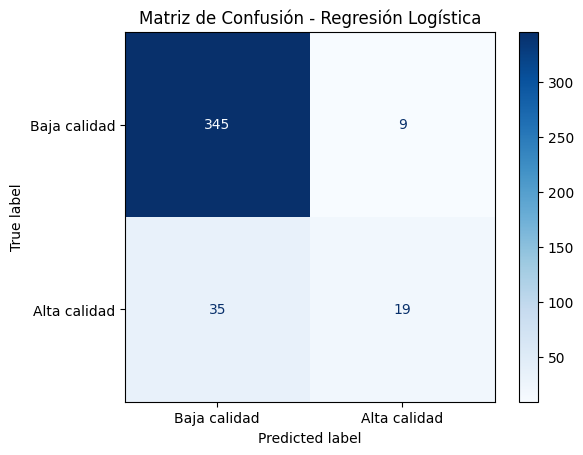

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predecir los valores con el modelo entrenado
y_pred = model.predict(X_test)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Mostrar la matriz con etiquetas
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Baja calidad", "Alta calidad"])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

## Interpretación de la matriz de confusión

355: Predijo correctamente baja calidad (Acierto)

9: Predijo alta calidad cuando era baja (Error)

35: Predijo baja calidad cuando era alta (Error)

19: Predijo correctamente alta calidad (Acierto)



## Interpretación de la evaluación del modelo

1. Accuracy = 0.89 (Alta precisión. Acierto en el 89% de los casos)
2. Precisión (0.91): El 91% de los vinos que el modelo predijo como no alta calidad efectivamente lo eran.
3. Recall (0.97): El 97% de todos los vinos que realmente no eran de alta calidad fueron identificados correctamente.
4. F1-score (0.94): Muy buen balance entre precisión y recall